# Agentchat API with Assistant Agent

In [105]:
from autogen_agentchat.agents import AssistantAgent
from autogen_core.models import UserMessage

In [106]:
# model
from autogen_ext.models.openai import OpenAIChatCompletionClient
from dotenv import load_dotenv
load_dotenv()
import os
api_key =  os.getenv("OPEN_ROUTER_API_KEY")

In [107]:
model_client = OpenAIChatCompletionClient(
    base_url="https://openrouter.ai/api/v1",
    api_key=api_key,
    model="deepseek/deepseek-r1-0528:free",
    model_info={
        "family": "deepseek",
        "vision": False,
        "function_calling": True,
        "json_output": False,
        "structured_output": True
    }
)

In [ ]:
my_assistant = AssistantAgent(name="Assistant", model_client=model_client)

In [109]:
result = await my_assistant.run(task="who are you?")
print(result)

messages=[TextMessage(id='a59a0d05-72d3-4e96-bab8-5a0a122370e5', source='user', models_usage=None, metadata={}, created_at=datetime.datetime(2026, 2, 10, 18, 18, 8, 441391, tzinfo=datetime.timezone.utc), content='who are you?', type='TextMessage'), TextMessage(id='97c6ed2a-36ad-4156-b029-3026d7e99a53', source='Assistant', models_usage=RequestUsage(prompt_tokens=35, completion_tokens=569), metadata={}, created_at=datetime.datetime(2026, 2, 10, 18, 19, 15, 730238, tzinfo=datetime.timezone.utc), content="I am DeepSeek-R1, an AI assistant developed by DeepSeek. I'm here to help you with tasks, answer questions, and provide support. How can I assist you today?  \n\nTERMINATE", type='TextMessage')] stop_reason=None


In [110]:
result = await my_assistant.run(task="what was my last question I asked?")
print(result)

messages=[TextMessage(id='c65788d4-7a51-4709-85c6-14232e45837e', source='user', models_usage=None, metadata={}, created_at=datetime.datetime(2026, 2, 10, 18, 19, 15, 888627, tzinfo=datetime.timezone.utc), content='what was my last question I asked?', type='TextMessage'), TextMessage(id='e162bc96-a12e-4dce-9cfc-6c7859245671', source='Assistant', models_usage=RequestUsage(prompt_tokens=90, completion_tokens=389), metadata={}, created_at=datetime.datetime(2026, 2, 10, 18, 19, 49, 16144, tzinfo=datetime.timezone.utc), content='Your last question was: "who are you?"  \n\nTERMINATE', type='TextMessage')] stop_reason=None


In [111]:
result = await my_assistant.run(task="what is the capital of India and what is 4 + 4?")
print(result)

messages=[TextMessage(id='21886f8b-6dad-42b2-873a-58829856b501', source='user', models_usage=None, metadata={}, created_at=datetime.datetime(2026, 2, 10, 18, 19, 49, 35661, tzinfo=datetime.timezone.utc), content='what is the capital of India and what is 4 + 4?', type='TextMessage'), TextMessage(id='45d472b9-b805-4588-857d-c90c62bcc12a', source='Assistant', models_usage=RequestUsage(prompt_tokens=122, completion_tokens=98), metadata={}, created_at=datetime.datetime(2026, 2, 10, 18, 19, 59, 111266, tzinfo=datetime.timezone.utc), content='The capital of India is **New Delhi**.  \n\n4 + 4 equals **8**.', type='TextMessage')] stop_reason=None


In [112]:
result = await my_assistant.run(task="what was my first question and answer? and also seond question and answer?")
print(result)

messages=[TextMessage(id='d5d094a9-d686-4976-a0f3-4bdac67c477d', source='user', models_usage=None, metadata={}, created_at=datetime.datetime(2026, 2, 10, 18, 19, 59, 130074, tzinfo=datetime.timezone.utc), content='what was my first question and answer? and also seond question and answer?', type='TextMessage'), TextMessage(id='885ae8ce-a35e-4074-82b0-38b7cb2adc4d', source='Assistant', models_usage=RequestUsage(prompt_tokens=159, completion_tokens=496), metadata={}, created_at=datetime.datetime(2026, 2, 10, 18, 20, 41, 346889, tzinfo=datetime.timezone.utc), content='Your first question and answer:  \n**Question:** "who are you?"  \n**Answer:** "I am DeepSeek-R1, an AI assistant developed by DeepSeek. I\'m here to help you with tasks, answer questions, and provide support. How can I assist you today?"  \n\nYour second question and answer:  \n**Question:** "what was my last question I asked?"  \n**Answer:** "Your last question was: \'who are you?\'"  \n\nTERMINATE', type='TextMessage')] st

In [113]:
print(result.messages[-1].content)

Your first question and answer:  
**Question:** "who are you?"  
**Answer:** "I am DeepSeek-R1, an AI assistant developed by DeepSeek. I'm here to help you with tasks, answer questions, and provide support. How can I assist you today?"  

Your second question and answer:  
**Question:** "what was my last question I asked?"  
**Answer:** "Your last question was: 'who are you?'"  

TERMINATE


In [114]:
agent_state = await my_assistant.save_state()
print(agent_state)

{'type': 'AssistantAgentState', 'version': '1.0.0', 'llm_context': {'messages': [{'content': 'who are you?', 'source': 'user', 'type': 'UserMessage'}, {'content': "I am DeepSeek-R1, an AI assistant developed by DeepSeek. I'm here to help you with tasks, answer questions, and provide support. How can I assist you today?  \n\nTERMINATE", 'thought': None, 'source': 'Assistant', 'type': 'AssistantMessage'}, {'content': 'what was my last question I asked?', 'source': 'user', 'type': 'UserMessage'}, {'content': 'Your last question was: "who are you?"  \n\nTERMINATE', 'thought': None, 'source': 'Assistant', 'type': 'AssistantMessage'}, {'content': 'what is the capital of India and what is 4 + 4?', 'source': 'user', 'type': 'UserMessage'}, {'content': 'The capital of India is **New Delhi**.  \n\n4 + 4 equals **8**.', 'thought': None, 'source': 'Assistant', 'type': 'AssistantMessage'}, {'content': 'what was my first question and answer? and also seond question and answer?', 'source': 'user', 't

# Multi Model Capabilities

In [117]:
vision_model_client = OpenAIChatCompletionClient(
    base_url="https://openrouter.ai/api/v1",
    api_key=api_key,
    model="nvidia/nemotron-nano-12b-v2-vl:free",
    model_info={
        "family": "nvidia",
        "vision": True,
        "function_calling": True,
        "json_output": False,
        "structured_output": True
    }
)
vision_assistant = AssistantAgent(name="VisionAssistant", model_client=vision_model_client)


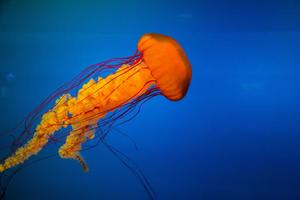

In [118]:
from io import BytesIO
import PIL
import requests
from autogen_agentchat.messages import MultiModalMessage
from autogen_core import Image

# Create a multi-modal message with random image and text.
pil_image = PIL.Image.open(BytesIO(requests.get("https://picsum.photos/300/200").content))
img = Image(pil_image)
multi_modal_message = MultiModalMessage(content=["Can you describe the content of this image?", img], source="user")
img

In [119]:
# Use asyncio.run(...) when running in a script.
result = await vision_assistant.run(task=multi_modal_message)
print(result.messages[-1].content)  # type: ignore

The image shows a close - up of a jellyfish with a prominent orange, dome - shaped bell and long, trailing tentacles. The jellyfish is set against a solid blue background, which contrasts with its vibrant orange hue. The tentacles appear to be a lighter shade, possibly yellow, and extend outward from the bell, giving the jellyfish a flowing, translucent look as it moves through the water (or the simulated water environment in the image).. Therefore, the content of the image is a jellyfish in a blue - hued setting.



# structured model output

In [ ]:
from pydantic import BaseModel

class PlanetInfo(BaseModel):
    name: str
    color: str
    distance: str


In [ ]:
# -------- Model Client ----------
structured_model_client = OpenAIChatCompletionClient(
    base_url="https://openrouter.ai/api/v1",
    api_key=api_key,
    model="openai/gpt-4o-mini",    
    model_info={
        "family": "openai",
        "vision": False,
        "function_calling": True,
        "json_output": True,
        "structured_output": True
    },
    response_format=PlanetInfo,
)

# -------- Agent ----------
my_assistant2 = AssistantAgent(
    name="my_assistant2",
    model_client=structured_model_client,
)

# -------- Run ----------
result = await my_assistant2.run(
    task="Give information about Sun"
)

print(result)

messages=[TextMessage(id='28f30a0a-591c-46b6-9ea2-34f6401cef8b', source='user', models_usage=None, metadata={}, created_at=datetime.datetime(2026, 2, 10, 18, 46, 46, 483594, tzinfo=datetime.timezone.utc), content='Give information about Sun', type='TextMessage'), TextMessage(id='248d7948-af8b-4e24-a4c5-6780b2662b32', source='my_assistant2', models_usage=RequestUsage(prompt_tokens=97, completion_tokens=21), metadata={}, created_at=datetime.datetime(2026, 2, 10, 18, 46, 47, 893912, tzinfo=datetime.timezone.utc), content='{"name":"Sun","color":"Yellow","distance":"0 AU (center of the solar system)"}', type='TextMessage')] stop_reason=None
